In [1]:
from transformers import Speech2TextFeatureExtractor, Speech2TextModel
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from optimal_input.opt_input_with_betas import GetOptInput


model = Speech2TextModel.from_pretrained("facebook/s2t-small-librispeech-asr")
feature_extractor = Speech2TextFeatureExtractor.from_pretrained("facebook/s2t-small-librispeech-asr")
# reg = transformer_regression(dir, subject)

for param in model.parameters():
    param.requires_grad = False

layers = ["encoder.conv.conv_layers.0","encoder.conv.conv_layers.1","encoder.layers.0.fc2",
			"encoder.layers.1.fc2","encoder.layers.2.fc2","encoder.layers.3.fc2",
			"encoder.layers.4.fc2","encoder.layers.5.fc2","encoder.layers.6.fc2",
			"encoder.layers.7.fc2","encoder.layers.8.fc2","encoder.layers.9.fc2"]

a = np.load('/depot/jgmakin/data/auditory_cortex/betas/layer_0.npy', allow_pickle=True)
b = np.load('/depot/jgmakin/data/auditory_cortex/betas/layer_1.npy', allow_pickle=True)

# sr, aud = read("/depot/jgmakin/data/audio_data/sent_0.wav")
get_opt_input = GetOptInput(model, feature_extractor)

/home/akamsali/anaconda3/envs/research/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at facebook/s2t-small-librispeech-asr were not used when initializing Speech2TextModel: ['lm_head.weight']
- This IS expected if you are initializing Speech2TextModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Speech2TextModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Speech2TextModel were not initialized from the model checkpoint at facebook/s2t-small-librispeech-asr

In [9]:
loss_l0 = []
spect_l0 = []

for i in range(64):
    get_opt_input.get_opt_input(layers[1], b[:, i].reshape(-1, 1).astype('float32'), 30, iterations=100)
    loss_l0.append(get_opt_input.loss_list)
    spect_l0.append(get_opt_input.spect[0].detach().numpy().T)
np.save('/depot/jgmakin/data/auditory_cortex/opt_inputs/layer_1_64_channels.npy', spect_l0 ,allow_pickle=True)


In [ ]:
spect_l0[0].shape

In [11]:
(1.9/189)*30

0.30158730158730157

/tmp/ipykernel_15834/3905576324.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,8))


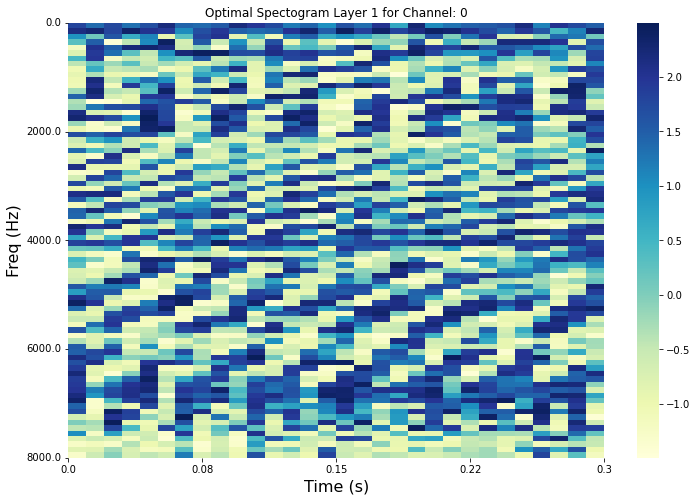

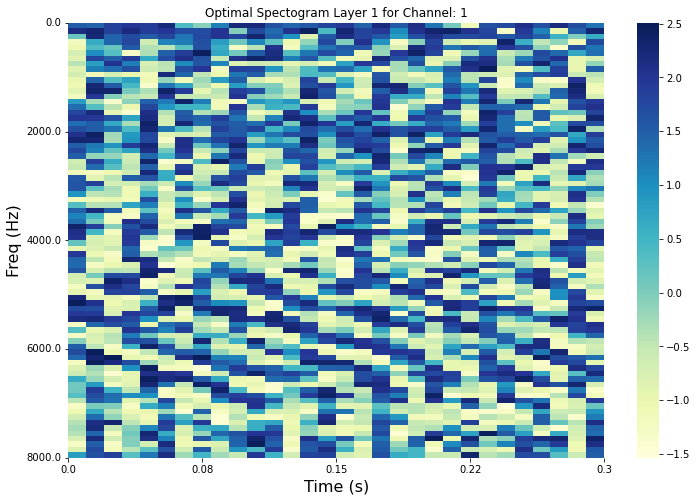

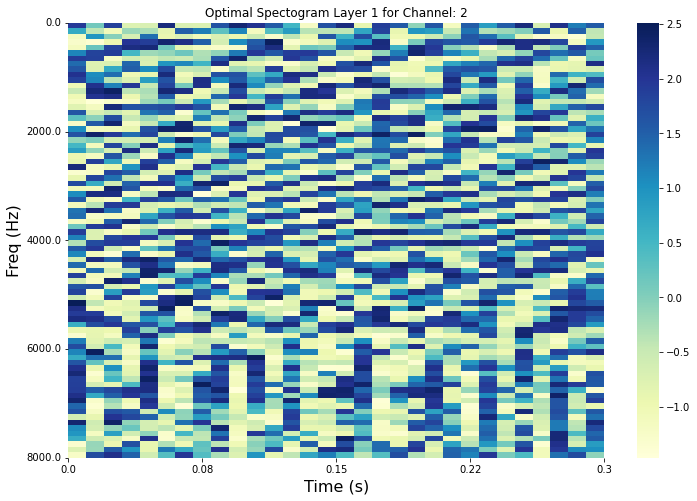

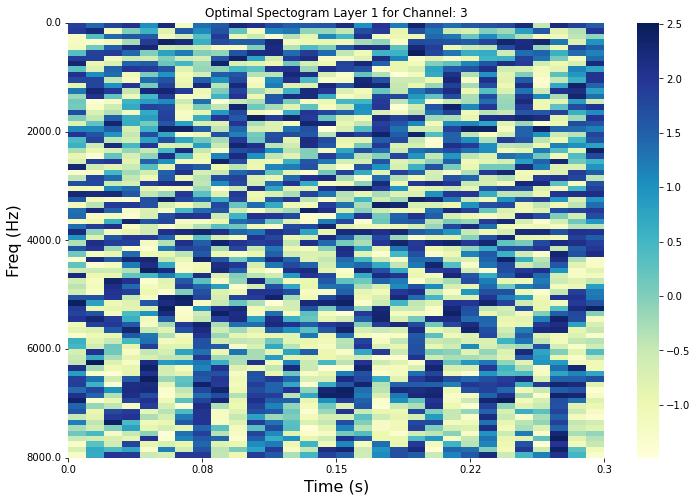

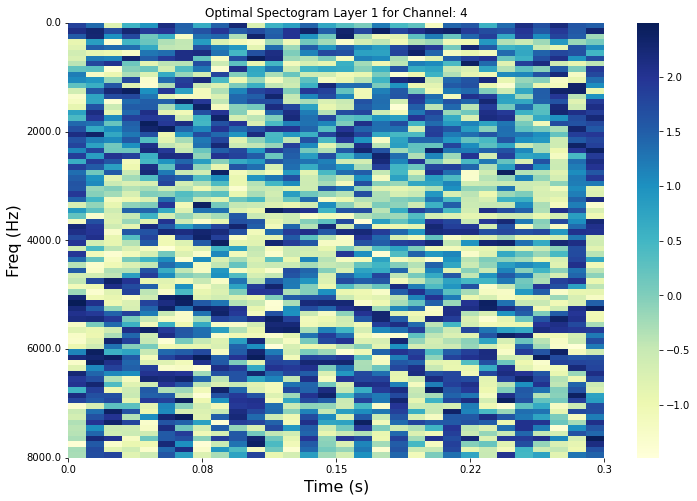

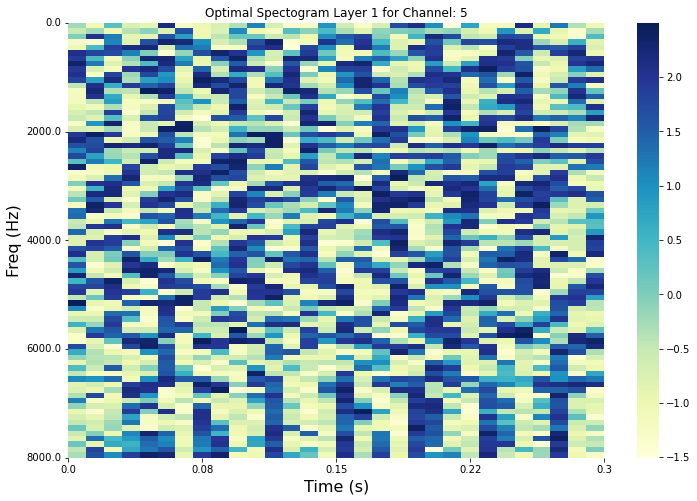

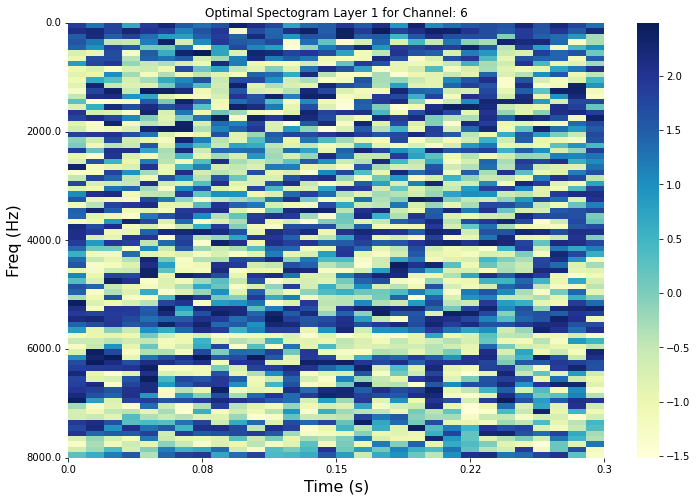

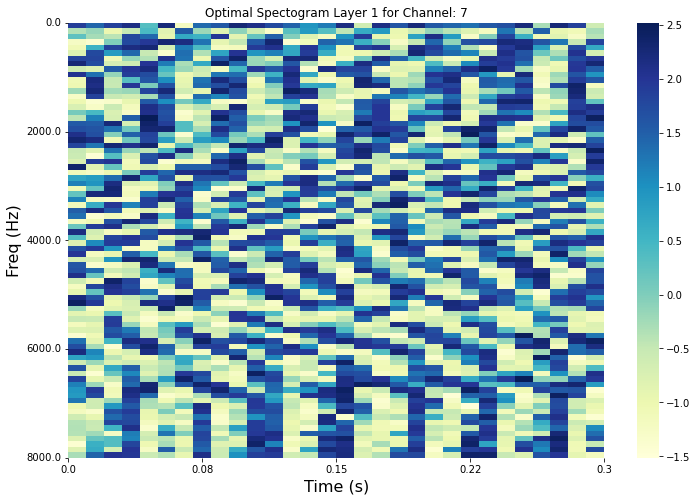

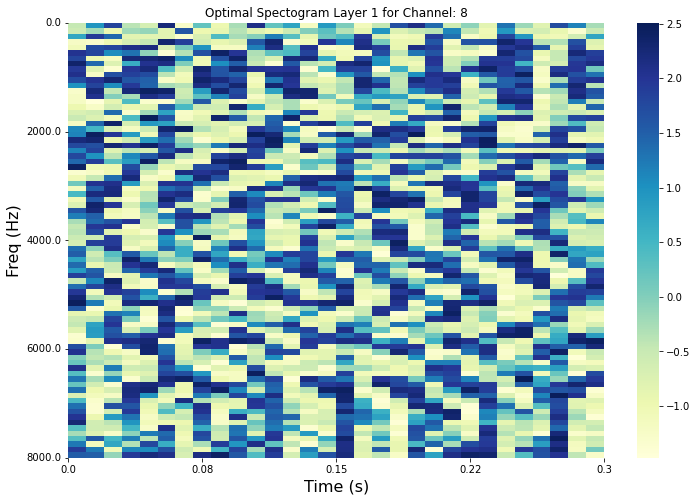

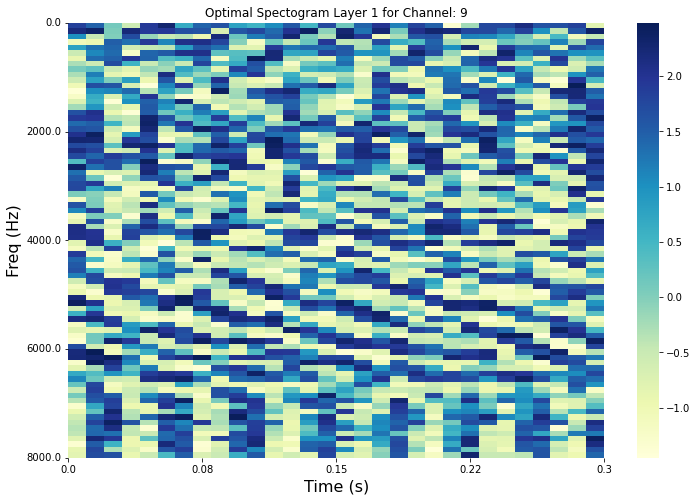

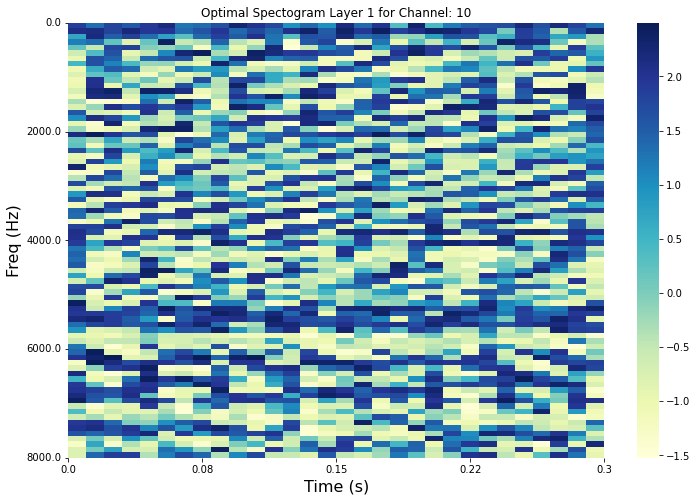

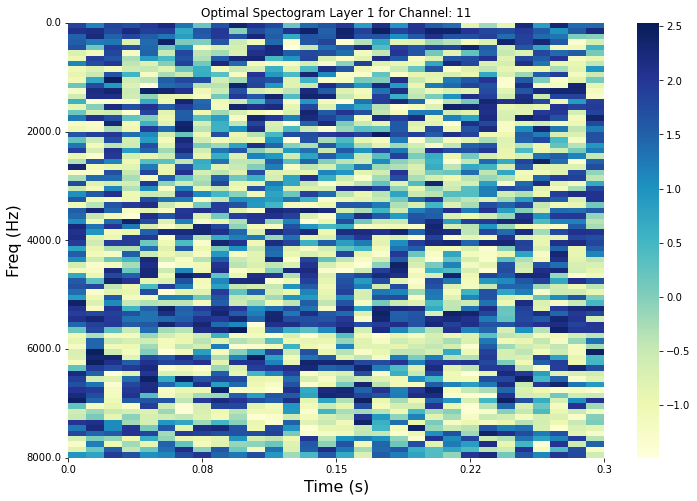

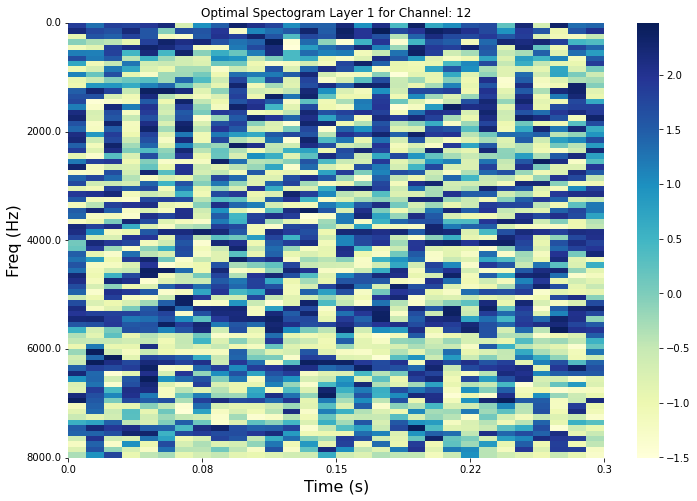

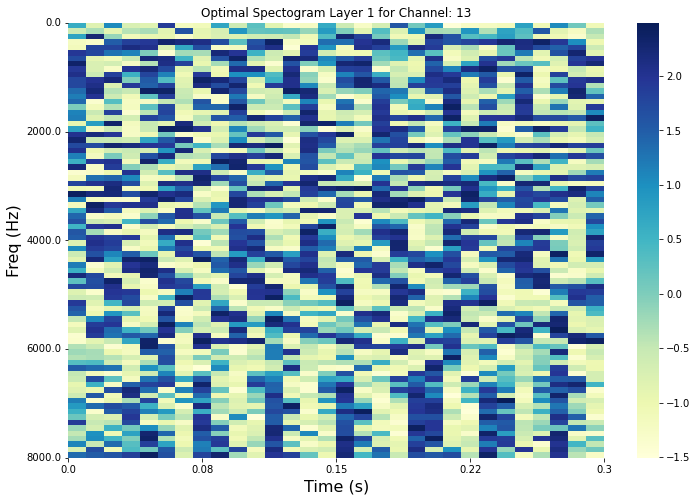

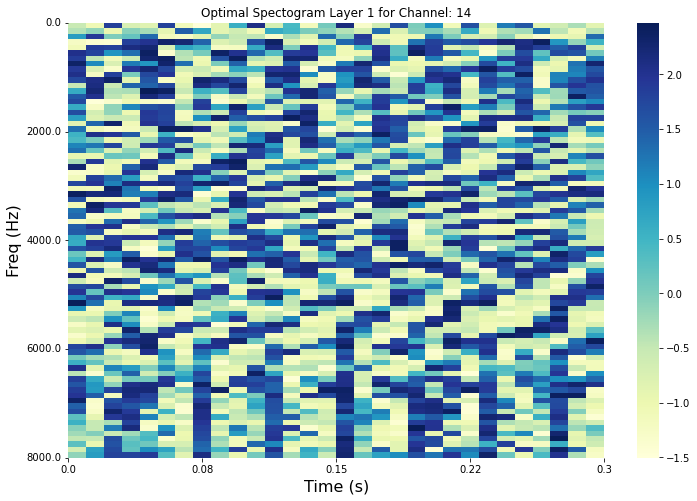

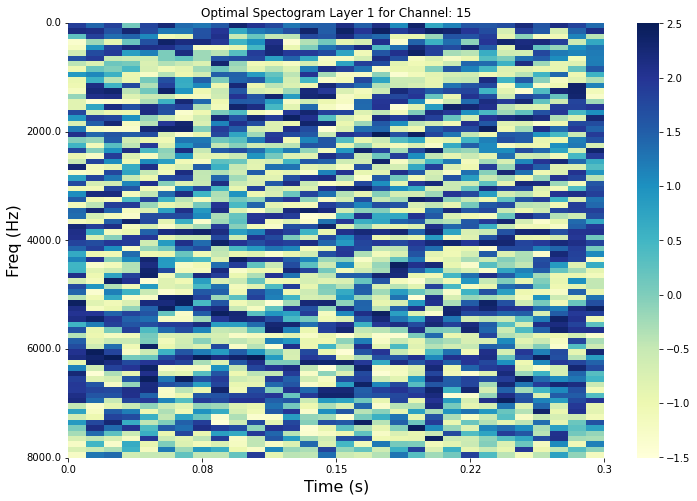

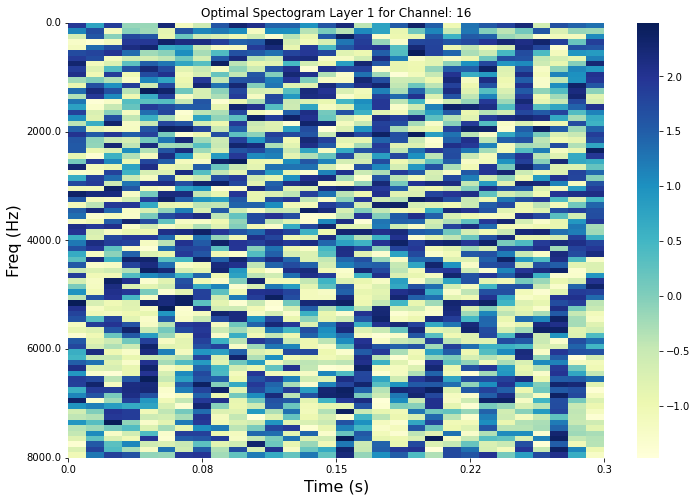

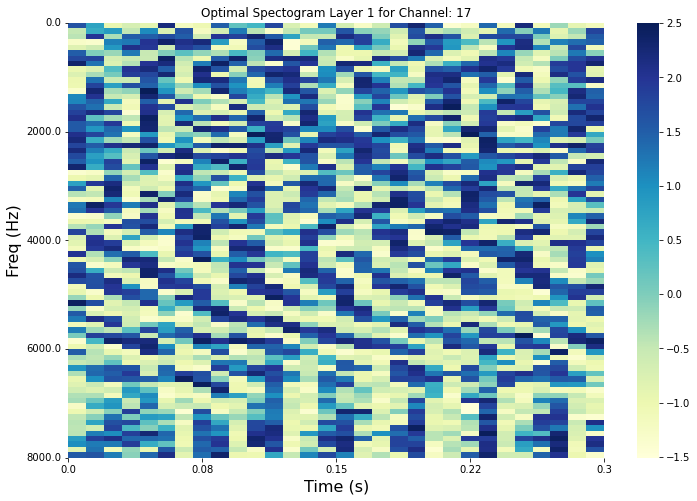

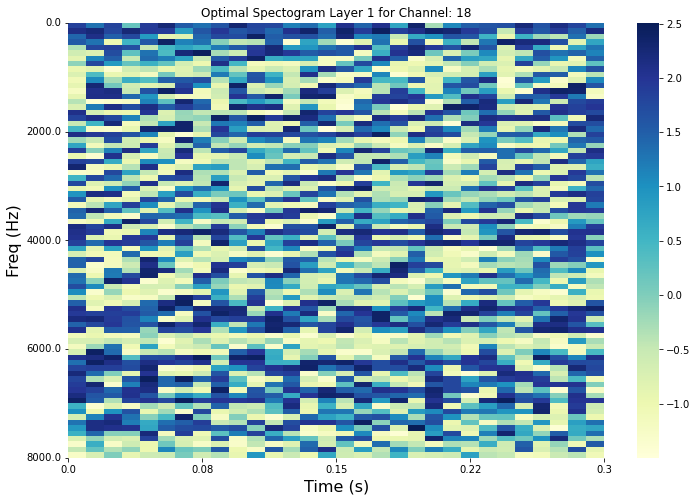

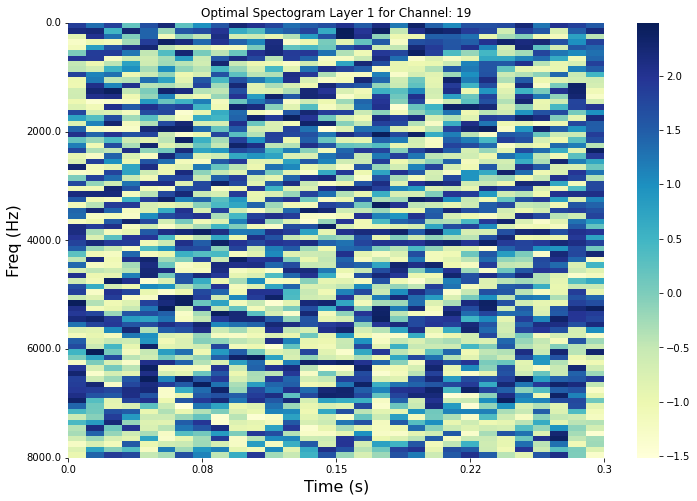

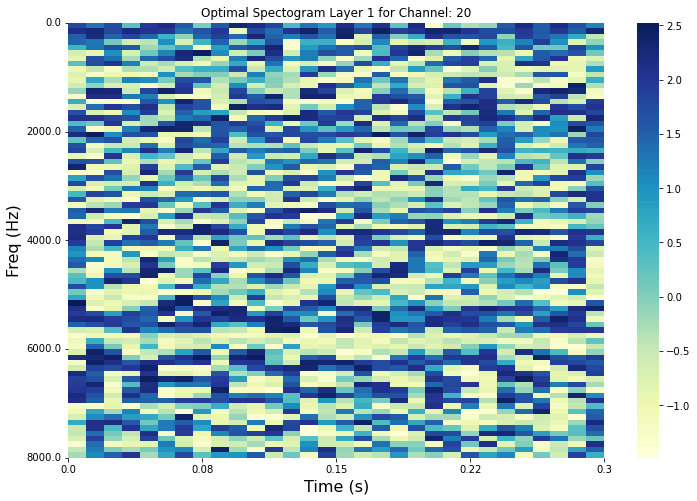

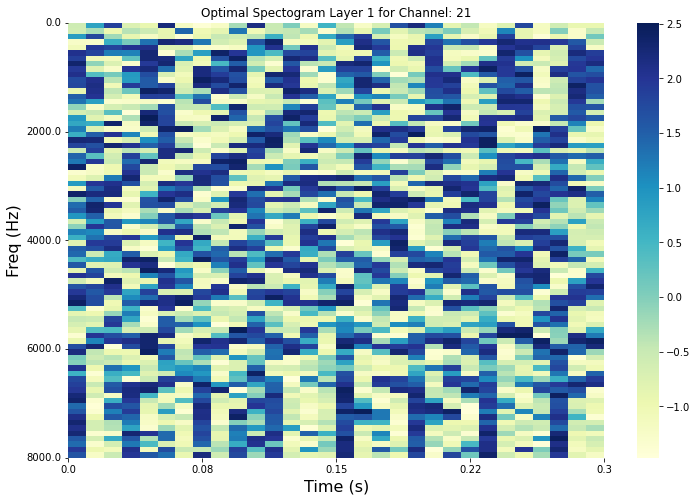

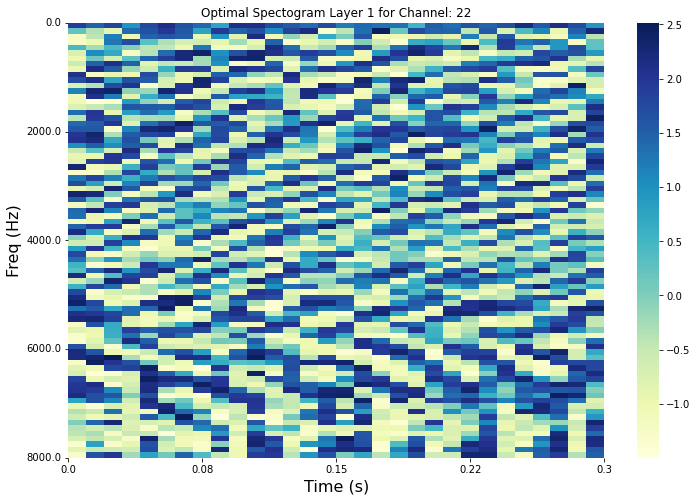

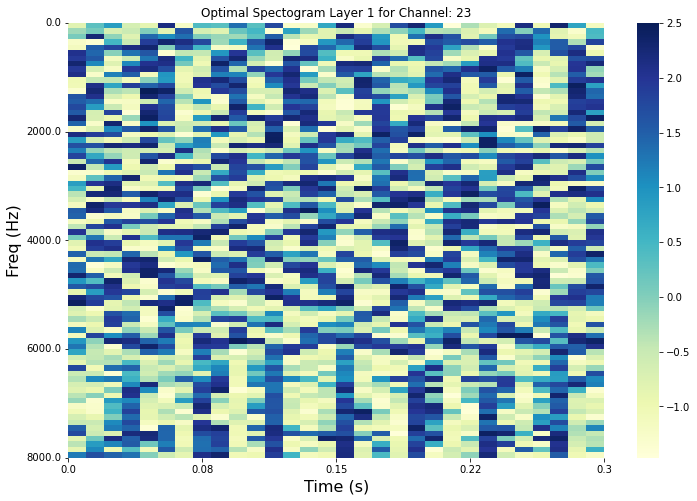

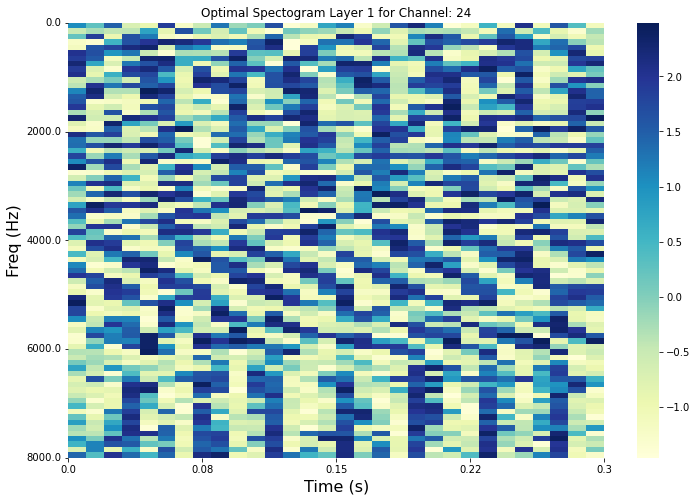

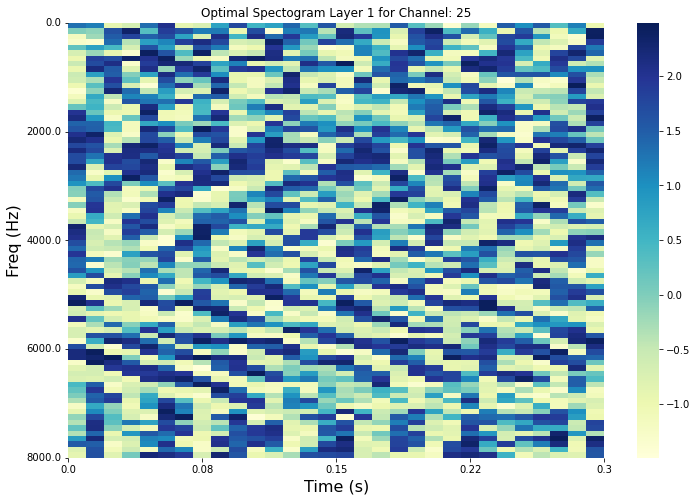

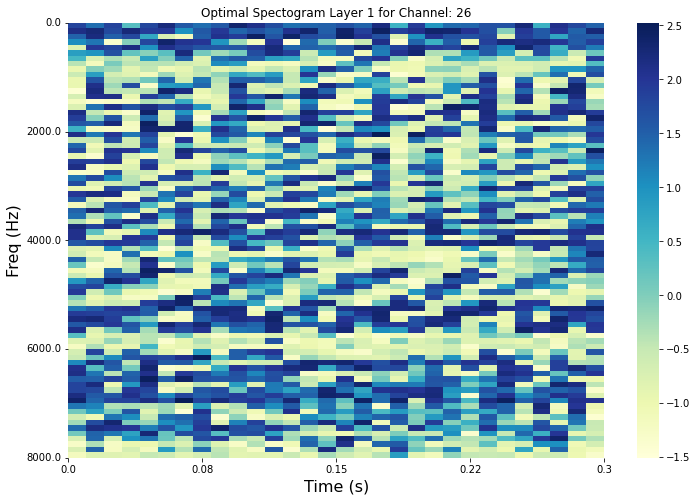

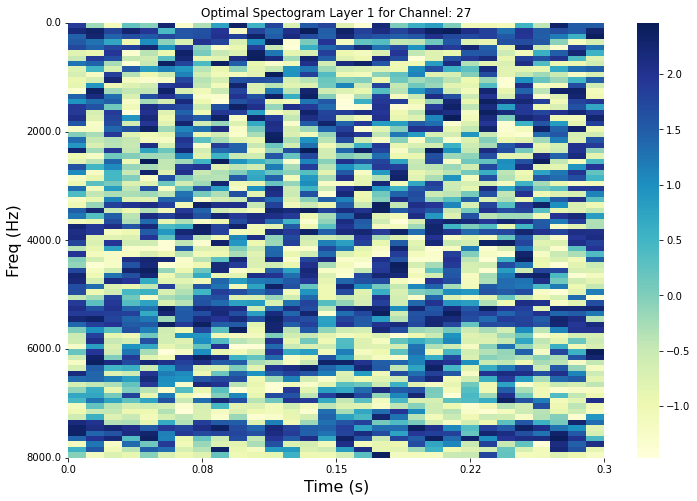

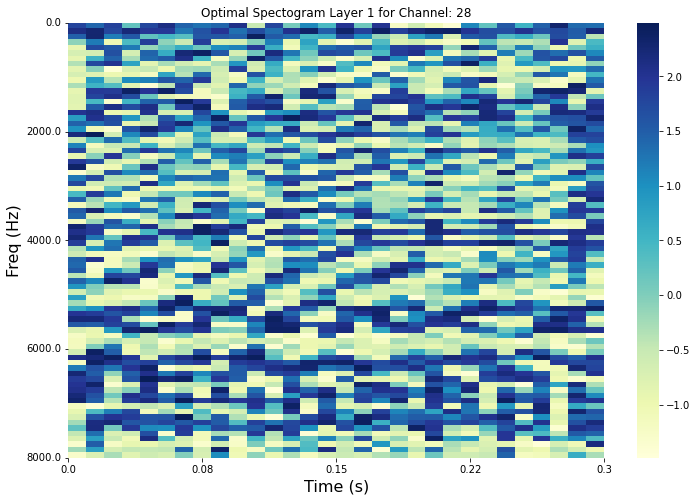

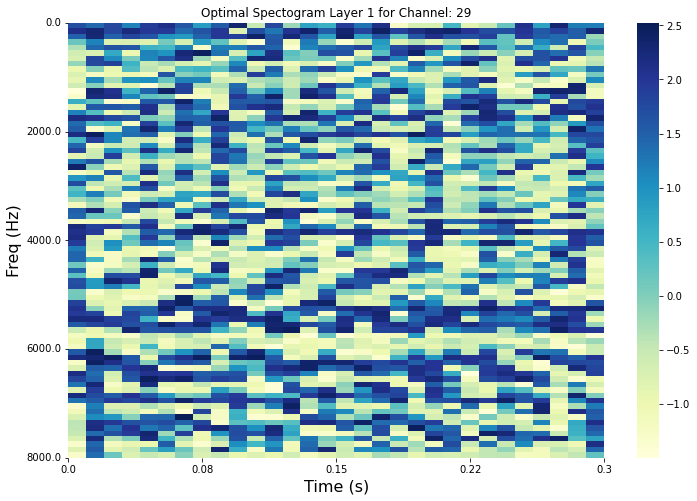

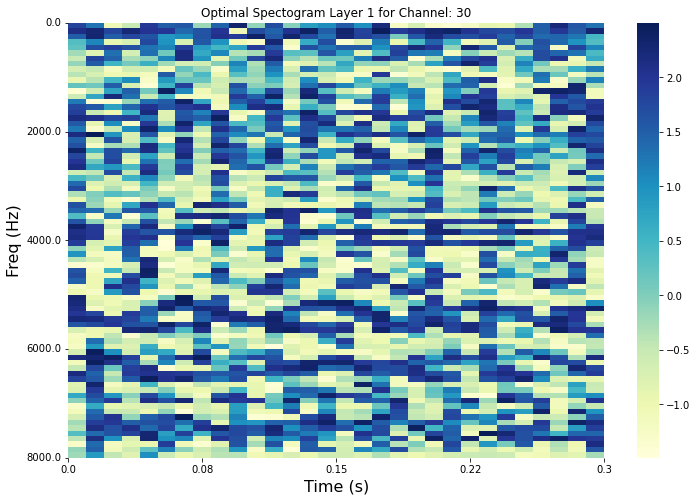

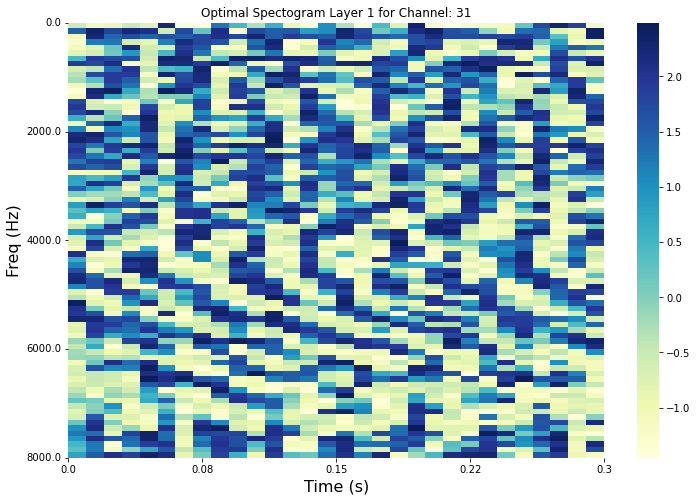

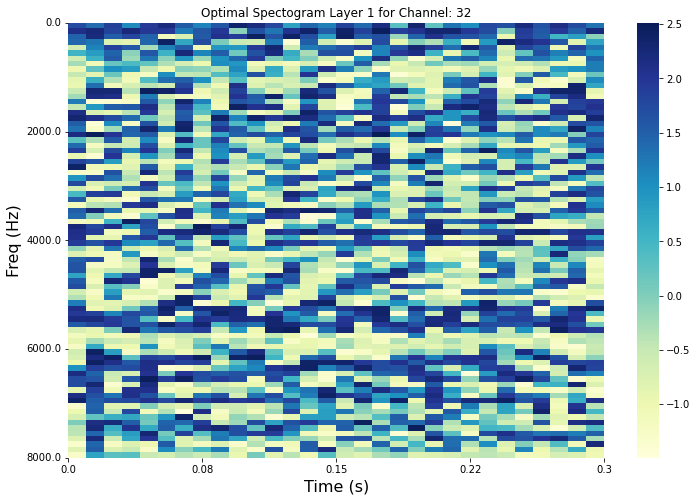

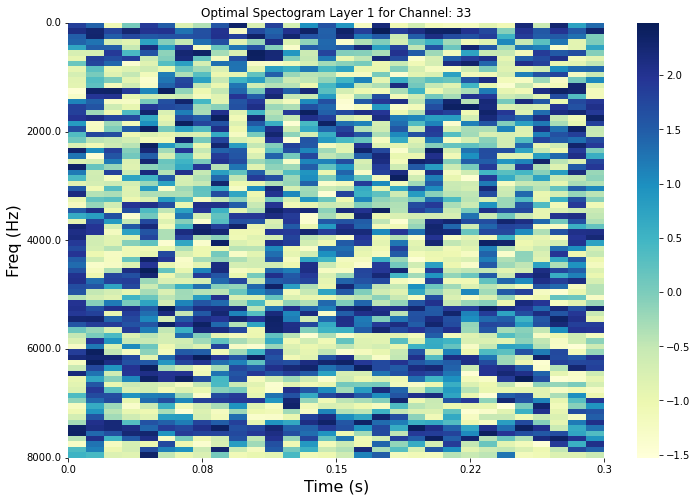

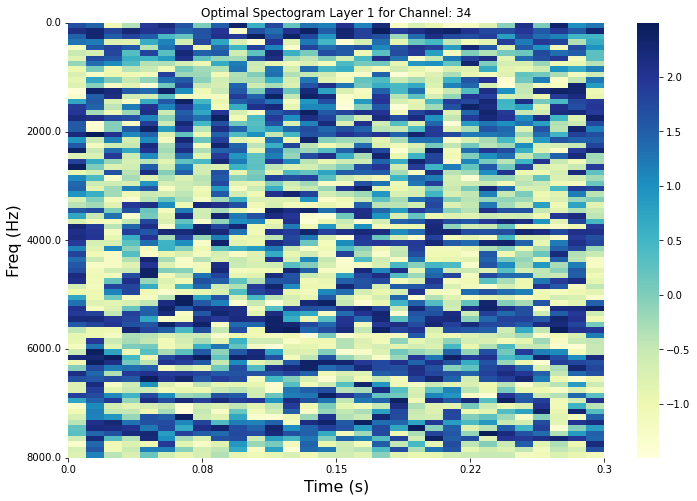

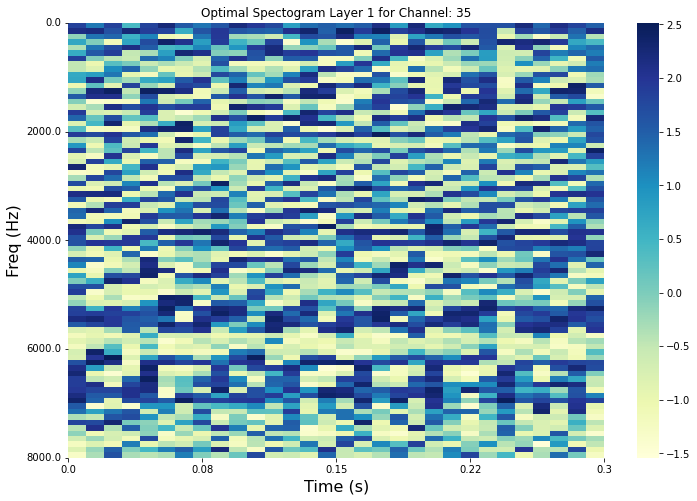

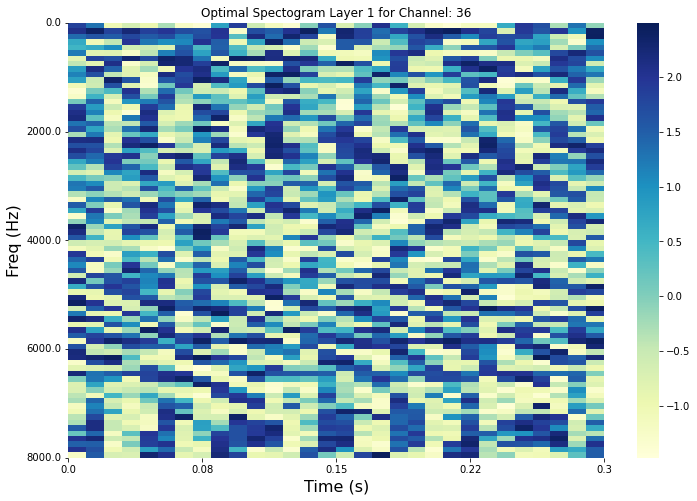

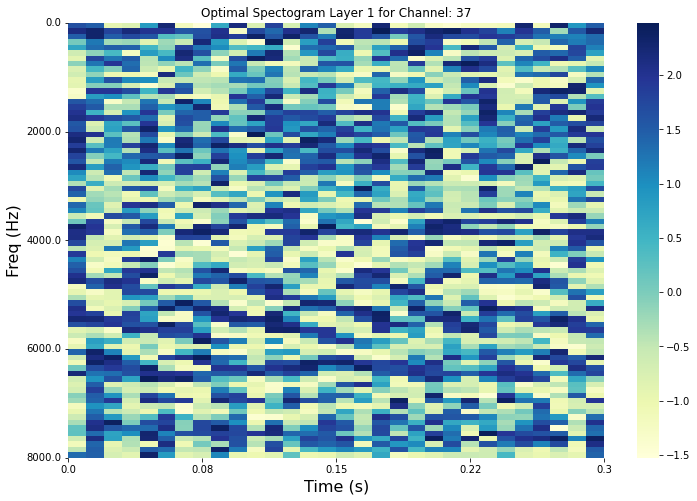

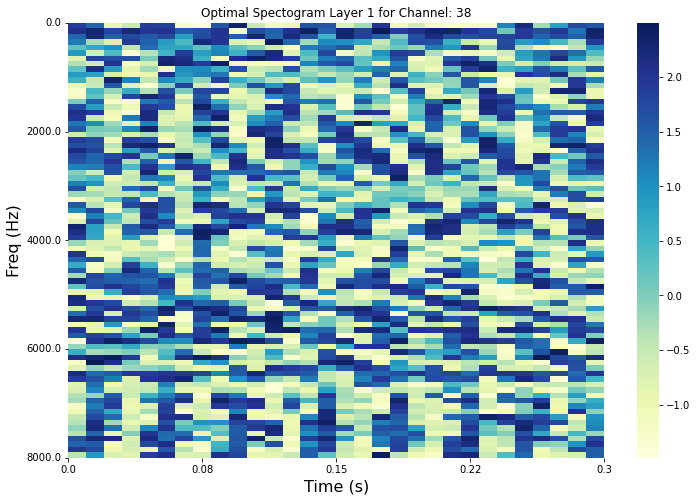

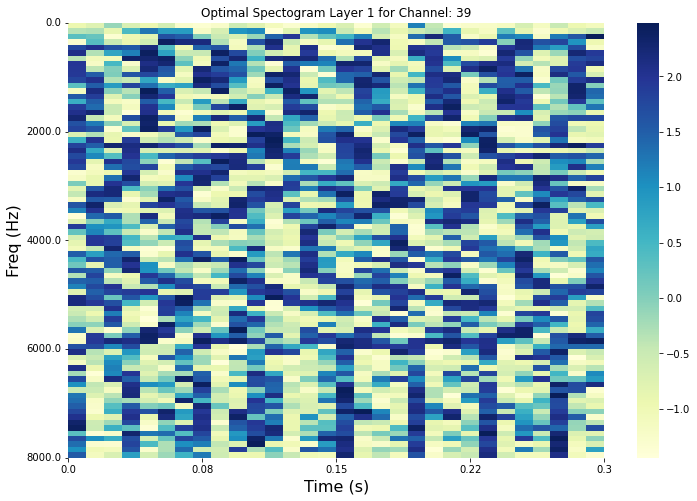

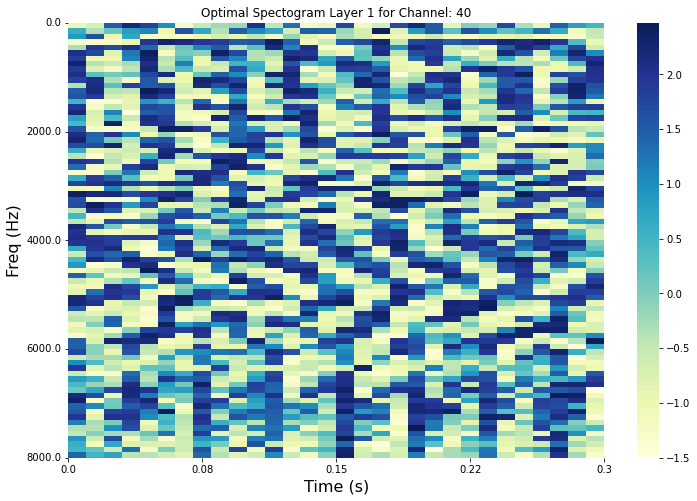

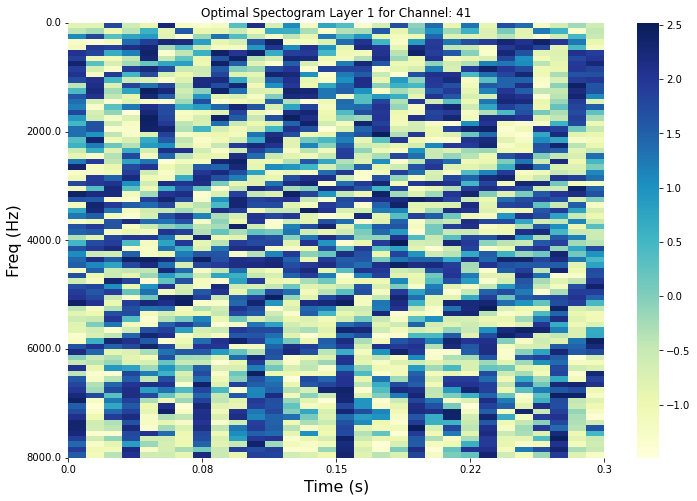

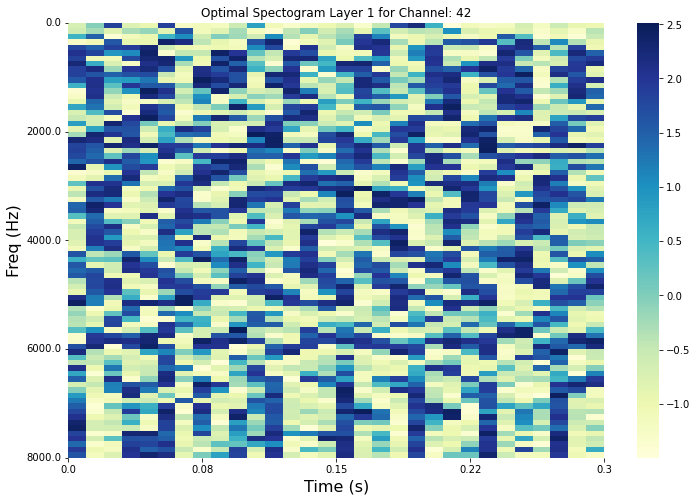

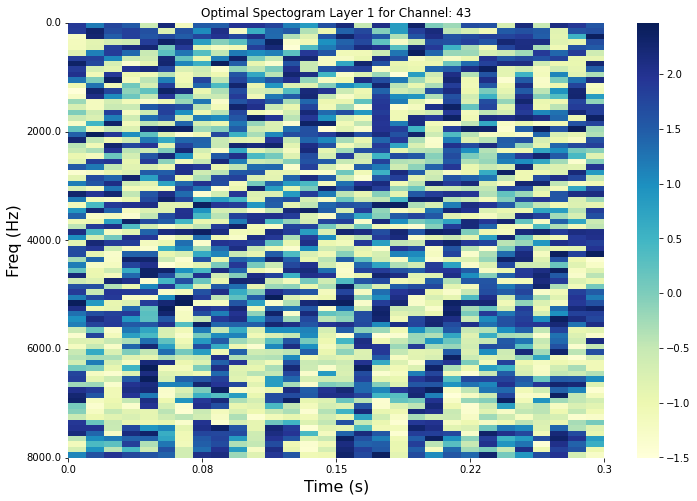

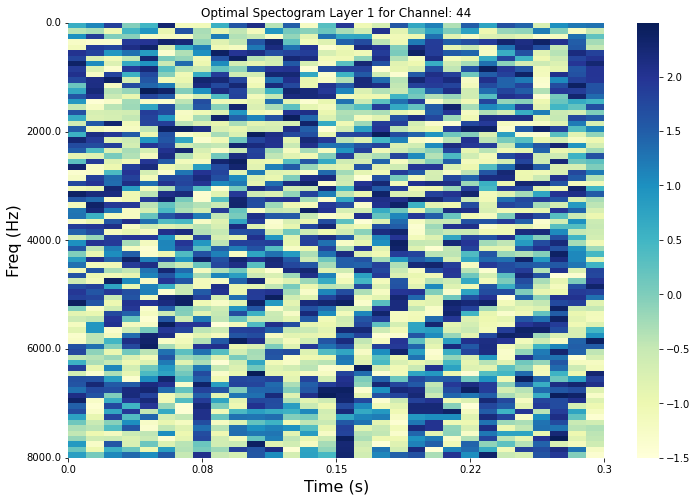

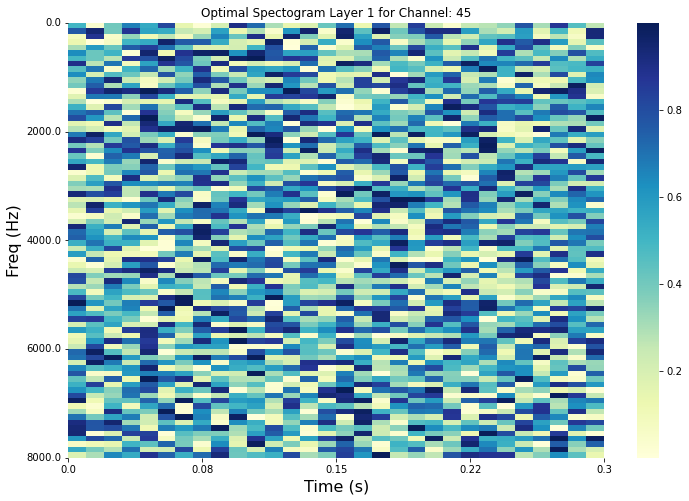

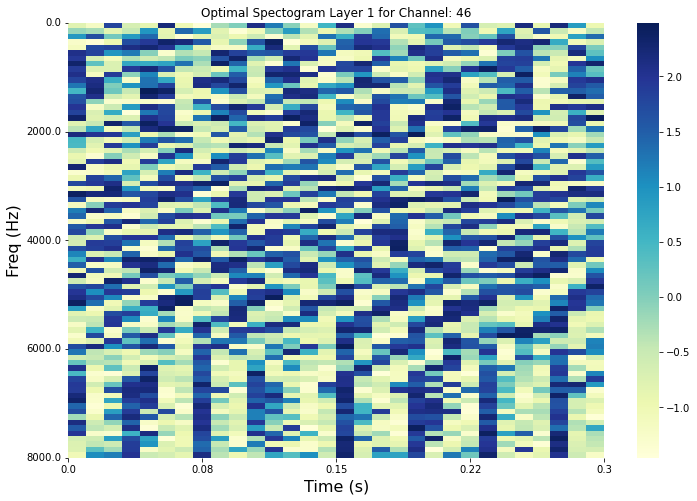

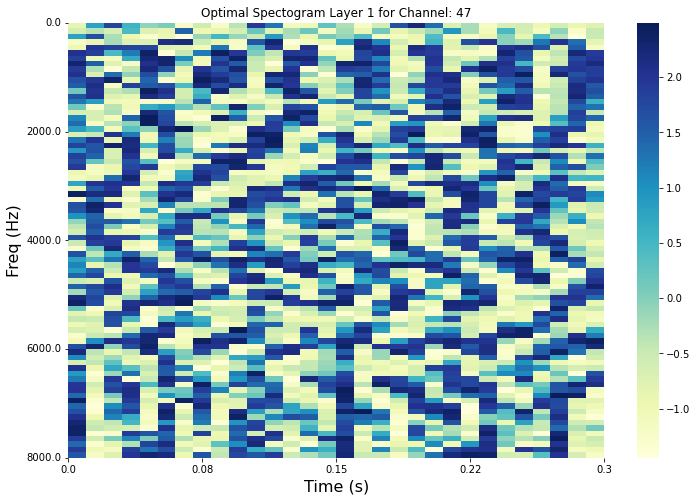

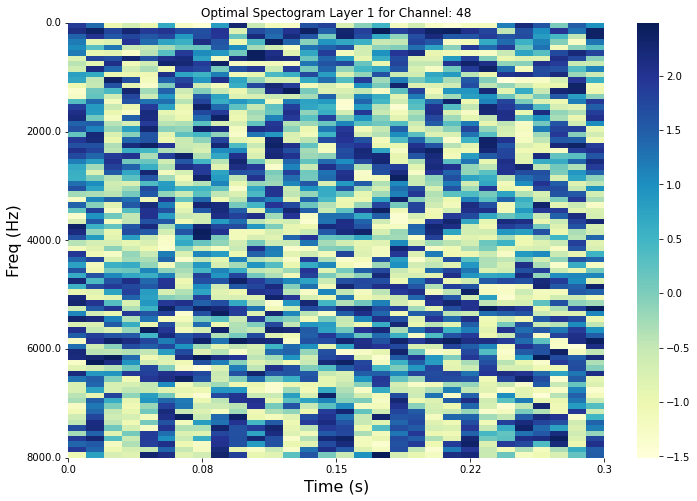

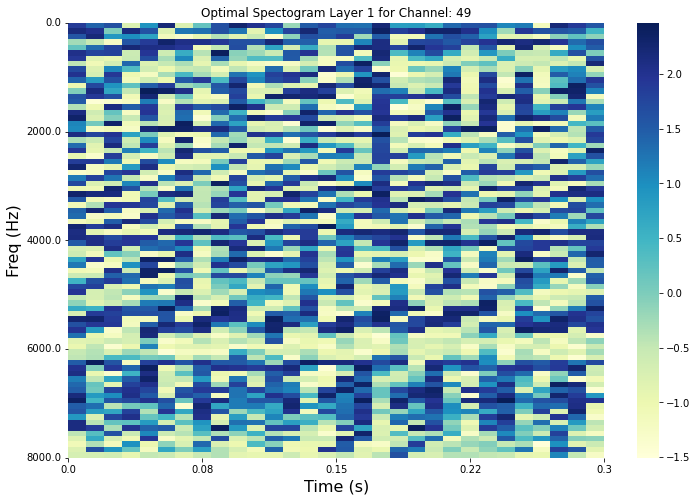

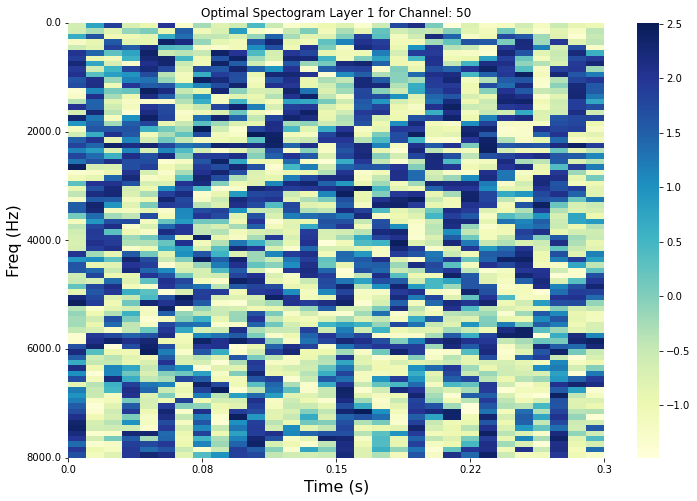

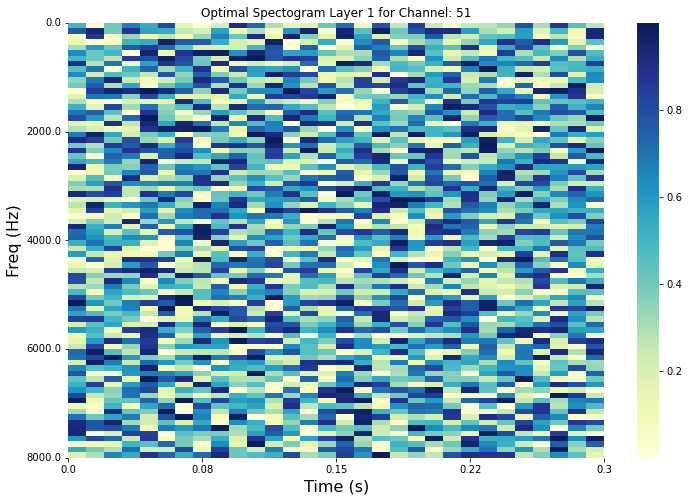

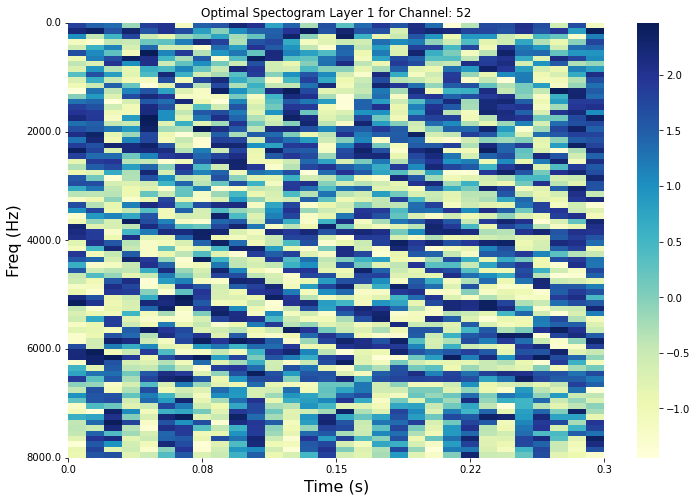

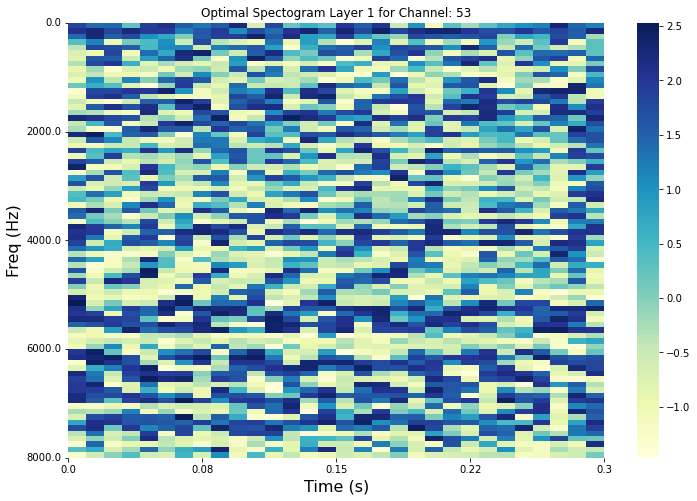

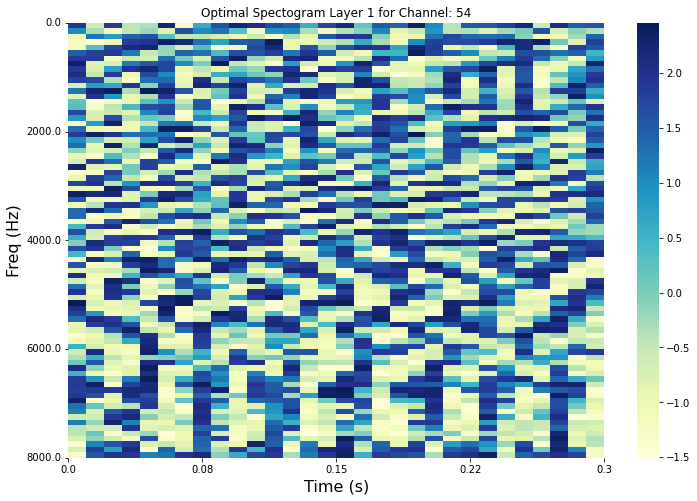

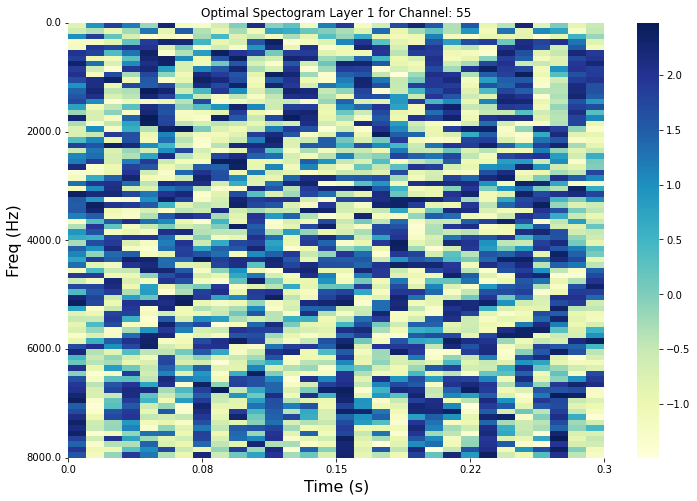

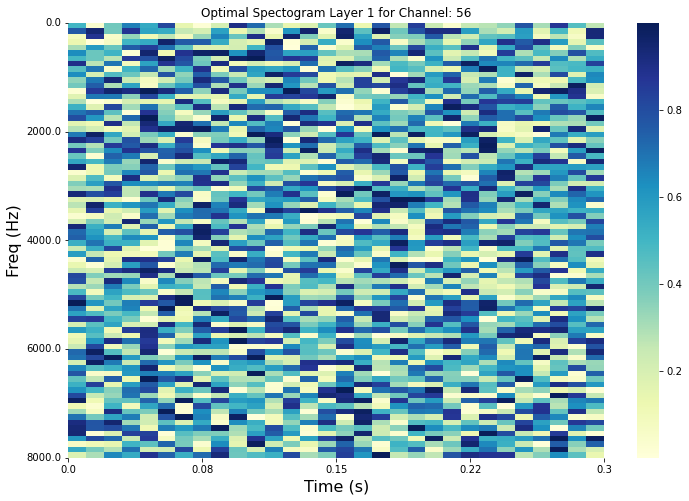

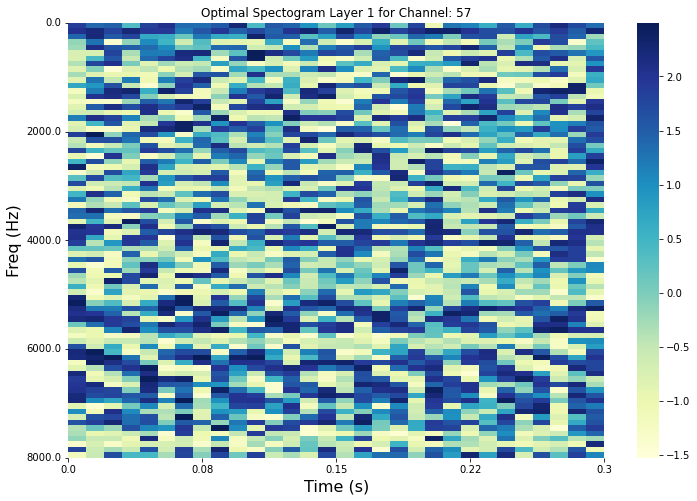

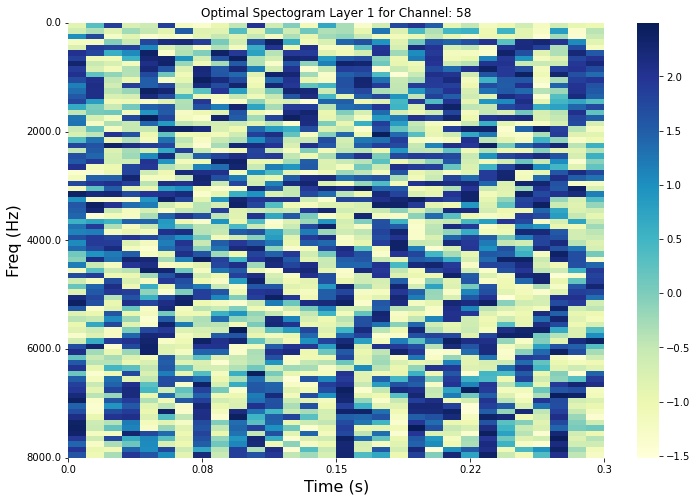

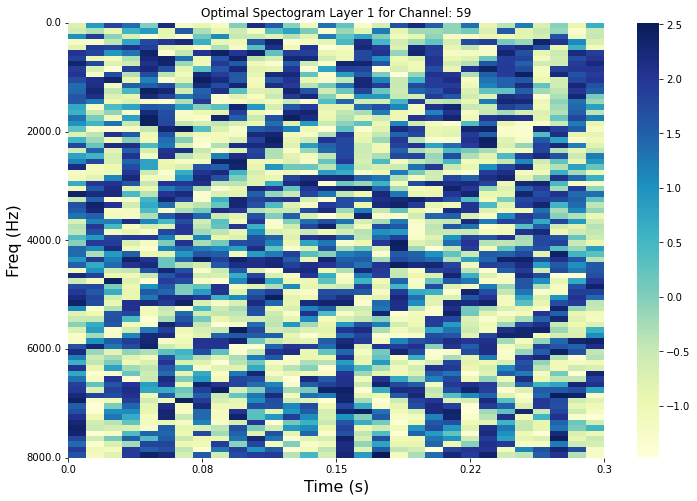

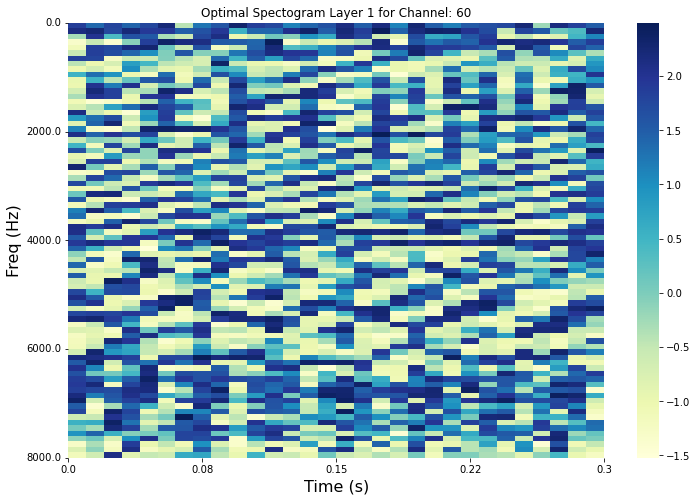

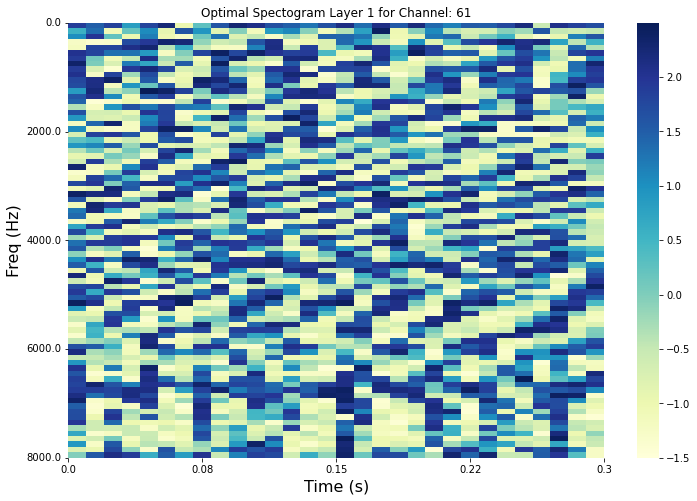

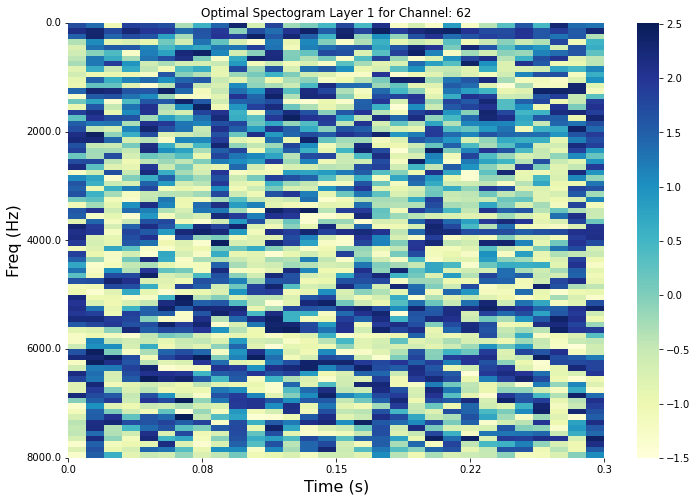

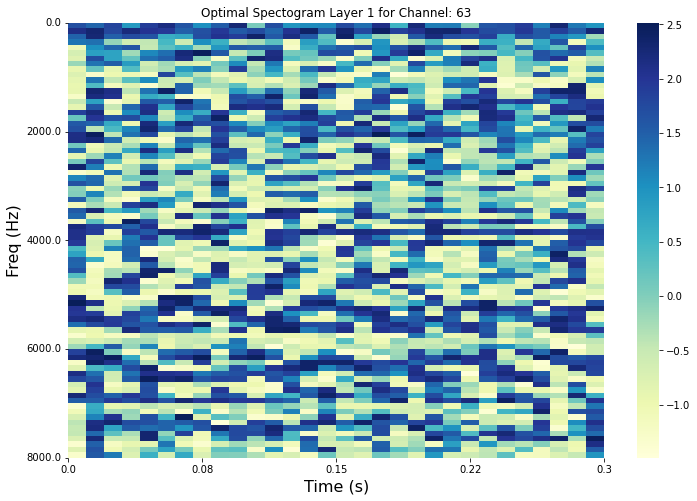

In [13]:
for i in range(64):
    plt.figure(figsize=(12,8))
    ax = sns.heatmap(spect_l0[i], cmap="YlGnBu")
    # plt.imshow(spect)
    plt.xticks(np.linspace(0, spect_l0[i].shape[1], 5), np.round(np.linspace(0,0.3,5), 2))
    plt.yticks(np.linspace(0, spect_l0[i].shape[0], 5), np.round(np.linspace(0,8000,5)))
    plt.xlabel('Time (s)', fontsize=16)
    plt.ylabel('Freq (Hz)', fontsize=16)
    plt.title(f"Optimal Spectogram Layer 1 for Channel: {i}")
    # plt.figure(figsize=(12,8))
    # plt.savefig(f'/depot/jgmakin/data/auditory_cortex/plots/layer_1_channel_{i}.svg')
plt.show()

In [ ]:
# for i in range(6):
# get_opt_input = GetOptInput(model, feature_extractor)
get_opt_input.get_opt_input(aud, layers[1], b[:, 32].astype('float32'), iterations=200)
loss_l1 = get_opt_input.loss_list
spect_l1 = get_opt_input.spect[0].detach().numpy().T

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(spect_l1, cmap="YlGnBu")
# plt.imshow(spect)
plt.xticks(np.linspace(0, spect_l1.shape[1], 5), np.round(np.linspace(0,1.9,5), 2))
plt.yticks(np.linspace(0, spect_l1.shape[0], 5), np.linspace(0,8000,5))
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Freq (Hz)', fontsize=16)
plt.title(f"Opt_input, Channel = {32}")

In [ ]:
# for i in range():
    # plt.figure()
    # plt.plot(loss_l0[i])
plt.figure(figsize=(12,8))
ax = sns.heatmap(spect_l0[32], cmap="YlGnBu")
# plt.imshow(spect)
plt.xticks(np.linspace(0, spect_l0[0].shape[1], 5), np.round(np.linspace(0,1.9,5), 2))
plt.yticks(np.linspace(0, spect_l0[0].shape[0], 5), np.linspace(0,8000,5))
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Freq (Hz)', fontsize=16)
plt.title(f"Opt_input, Channel = {32}")
    # plt.contour(a.T)
    # plt.figure(figsize=(12,8))
    # ax = sns.heatmap(a.T, cmap="YlGnBu")
    # plt.xticks(np.linspace(0, 1024, 16), np.round(np.linspace(0, 1024, 16)))
    # plt.yticks(np.linspace(0, 64, 8), np.round(np.linspace(0, 64, 8)))
    # plt.xlabel('Layer Units', fontsize=16)
    # plt.ylabel('Electrode Channels', fontsize=16)
    # plt.show()

In [ ]:
plt.figure()
plt.plot(loss_l1)
plt.figure(figsize=(12,8))
ax = sns.heatmap(spect_l1, cmap="YlGnBu")
# plt.imshow(spect)
plt.xticks(np.linspace(0, spect_l0.shape[1], 5), np.round(np.linspace(0,1.9,5), 2))
plt.yticks(np.linspace(0, spect_l1.shape[0], 5), np.linspace(0,8000,5))
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Freq (Hz)', fontsize=16)
plt.figure(figsize=(12,8))
# plt.contour(a.T)
ax = sns.heatmap(b.T, cmap="YlGnBu")
plt.xticks(np.linspace(0, 512, 16), np.round(np.linspace(0, 512, 16)))
plt.yticks(np.linspace(0, 64, 8), np.round(np.linspace(0, 64, 8)))
plt.xlabel('Layer Units', fontsize=16)
plt.ylabel('Electrode Channels', fontsize=16)
plt.show()

In [7]:
from transformers import Speech2TextForConditionalGeneration, Speech2TextProcessor

model_cg = Speech2TextForConditionalGeneration.from_pretrained("facebook/s2t-small-librispeech-asr")
processor_cg = Speech2TextProcessor.from_pretrained("facebook/s2t-small-librispeech-asr")

decoder_input_ids = torch.tensor([[1, 1]]) * model.config.decoder_start_token_id

In [ ]:
generated_ids = model_cg.generate(torch.tensor(spect_l0[1].T).unsqueeze(0))
transcription = processor_cg.batch_decode(generated_ids)[0]
print(generated_ids)
print(transcription)

In [ ]:
generated_ids = model_cg.generate(torch.tensor(spect_l1.T).unsqueeze(0))
transcription = processor_cg.batch_decode(generated_ids)[0]
transcription

In [ ]:
opt_out = np.load('/depot/jgmakin/data/auditory_cortex/opt_inputs/conv_layer_0_sent_0.npy', allow_pickle=True)

In [14]:
for i in range(64):
    generated_ids = model_cg.generate(torch.tensor(spect_l0[i].T).unsqueeze(0))
    transcription = processor_cg.batch_decode(generated_ids)[0]
    print(f"########## UNIT {i} ###########")
    print(transcription)
    print("#####################")


/home/akamsali/anaconda3/envs/research/lib/python3.8/site-packages/transformers/models/speech_to_text/modeling_speech_to_text.py:558: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  input_lengths = (input_lengths - 1) // 2 + 1


########## UNIT 0 ###########
shrieked prince th th thirchchchchchchchchchchchchchchchththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththththth
#####################
########## UNIT 1 ###########
from the room from the room from the room from the room from the room room room room with room room rooms with room room room room with room rooms room room room room room room with room rooms room room room room room room with room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room room